In [ ]:
!nvidia-smi

Sat May 10 12:59:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/yolov8-SIs-seg
!ls

Mounted at /content/gdrive
/content/gdrive/My Drive/yolov8-SIs-seg
CITATION.cff	 LICENSE	   runs		yolov8m-seg.pt
CONTRIBUTING.md  MANIFEST.in	   setup.cfg	yolov8n.pt
datasets	 mkdocs.yml	   setup.py	yolov8-SIs-seg.ipynb
docker		 README.md	   test
docs		 README.zh-CN.md   tests
examples	 requirements.txt  ultralytics


In [ ]:
%pip install -qr requirements.txt # install dependencies
import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.55 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.4/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

In [ ]:
# Load a model
model = YOLO("yolov8m-seg.yaml")  # build a new model from scratch
model = YOLO("yolov8m-seg.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="datasets/sis.yaml", epochs=100, patience=0, cache=True)  # train the model


                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.Conv                  [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.Conv                  [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.C2f                   [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.Conv                  [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.C2f                   [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.Conv                  [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.C2f                   [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.Conv                  [384

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-2f9f633a6502>", line 6, in <cell line: 6>
    model.train(data="datasets/sis.yaml", epochs=100, patience=0, cache=True)  # train the model
  File "/content/gdrive/MyDrive/yolov8-SIs-seg/ultralytics/yolo/engine/model.py", line 326, in train
    self.trainer.train()
  File "/content/gdrive/MyDrive/yolov8-SIs-seg/ultralytics/yolo/engine/trainer.py", line 186, in train
    self._do_train(RANK, world_size)
  File "/content/gdrive/MyDrive/yolov8-SIs-seg/ultralytics/yolo/engine/trainer.py", line 358, in _do_train
    self.save_metrics(metrics={**self.label_loss_items(self.tloss), **self.metrics, **self.lr})
  File "/content/gdrive/MyDrive/yolov8-SIs-seg/ultralytics/yolo/engine/trainer.py", line 506, in save_metrics
    s = '' if self.csv.exists() else (('%23s,' * n % tuple(['e

In [ ]:
# resume a model
model = YOLO("runs/segment/train/weights/last.pt")

# Use the model
model.train(resume=True, data="datasets/sis.yaml", epochs=100, patience=0, cache=True)  # train the model

New https://pypi.org/project/ultralytics/8.0.208 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.55 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=runs/segment/train/weights/last.pt, data=datasets/sis.yaml, epochs=100, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None

In [ ]:
# Save the original torch.load function
_original_torch_load = torch.load

# Define a new function that forces weights_only=False
def custom_torch_load(*args, **kwargs):
    if "weights_only" not in kwargs:
        kwargs["weights_only"] = False
    return _original_torch_load(*args, **kwargs)

# Override torch.load globally
torch.load = custom_torch_load

In [ ]:
model = YOLO("runs/segment/train/weights/sisv8-3.pt")
model.predict(source="test/images", conf=0.5, save=True)


image 1/1 /content/gdrive/MyDrive/yolov8-SIs-seg/test/images/test1.jpg: 384x640 3 Graspers, 68.8ms
Speed: 12.9ms preprocess, 68.8ms inference, 434.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes', 'masks']
 masks: ultralytics.yolo.engine.results.Masks object
 names: {0: 'Aspiration_Needle', 1: 'Grasper', 2: 'Harmonic_Ace', 3: 'Myoma_Screw', 4: 'Needle_Holder', 5: 'Suction', 6: 'Trocar'}
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
      

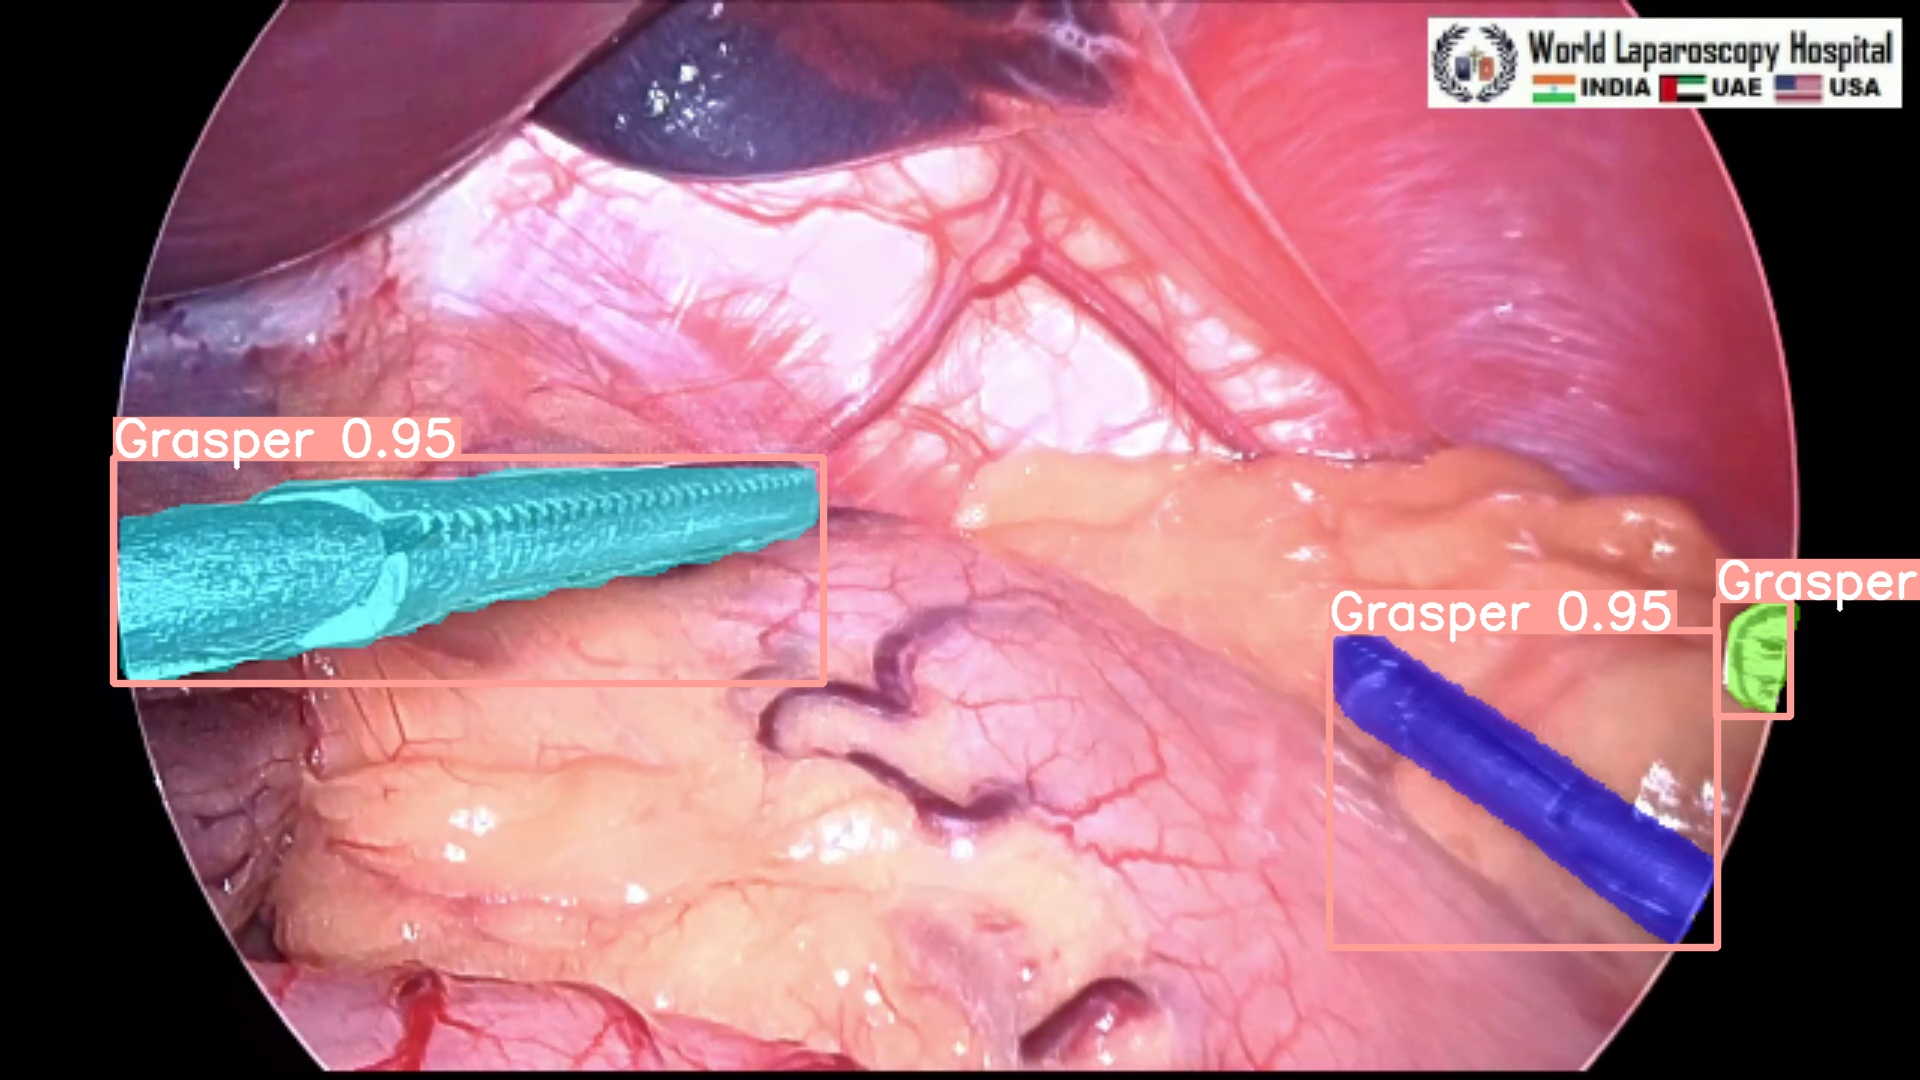

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")